In [1]:
import pandas as pd
#!pip install seaborn==0.12.0
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install numpy==1.23.2
import numpy as np

In [4]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


Dados tabular. Cada linha representa uma observação e cada coluna representa uma variável.

In [5]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
translate = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia',
    'time' : 'hora',
    'size' : 'pessoas'
}

In [7]:
gorjetas = df.rename(columns = translate)

Renomeando as colunas do DataFrame df usando um dicionário o "translate"

In [8]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


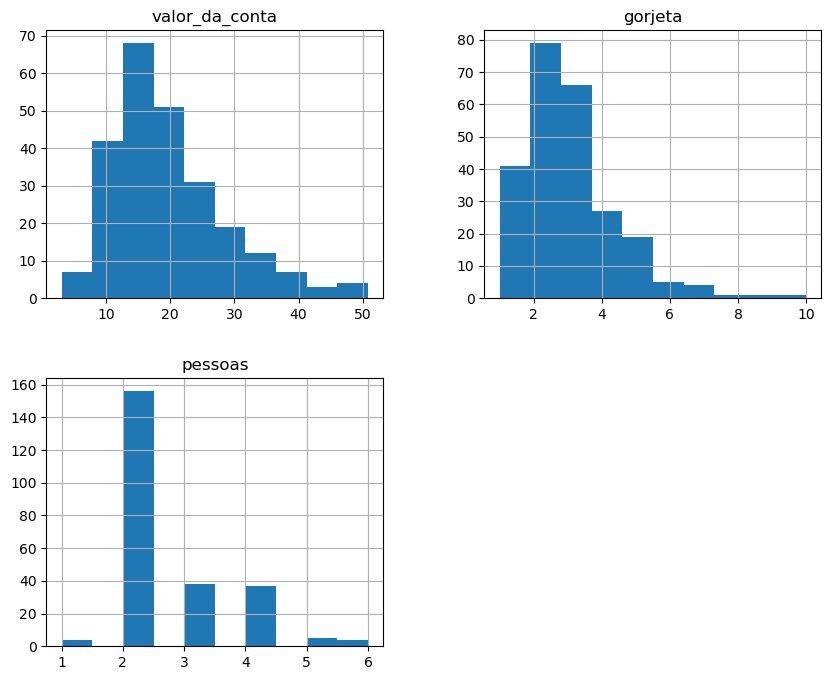

In [9]:
gorjetas.hist(figsize=(10, 8));

In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

Existem dois valores unicos, o No e o Yes na coluna de sobremesa

In [11]:
gorjetas.isnull().sum()

valor_da_conta    0
gorjeta           0
sobremesa         0
dia               0
hora              0
pessoas           0
dtype: int64

não ha valores nulos para influenciar em minha análise.

In [12]:
df.shape

(244, 6)

Quantidade de linhas e colunas.

In [13]:
df.dtypes

total_bill    float64
tip           float64
dessert        object
day            object
time           object
size            int64
dtype: object

Text(0.5, 0.98, 'Valor da conta x Valor da gorjeta')

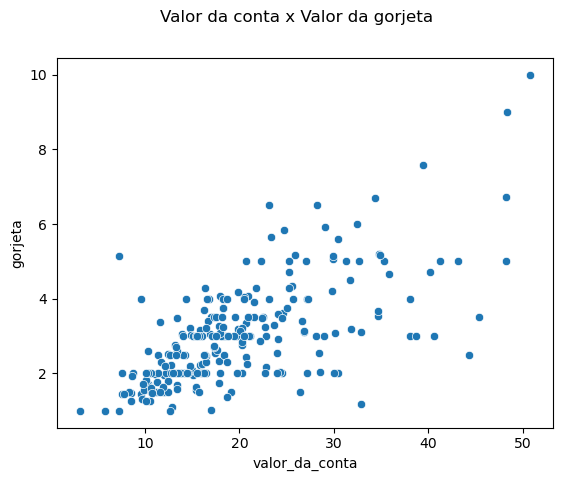

In [14]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta.figure.suptitle('Valor da conta x Valor da gorjeta')

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta.

In [15]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [15]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


Criando uma coluna chamada porcentagem e a exibindo

<Axes: title={'center': 'Análise do valor da gorjeta em função do valor da conta'}, xlabel='valor_da_conta', ylabel='porcentagem'>

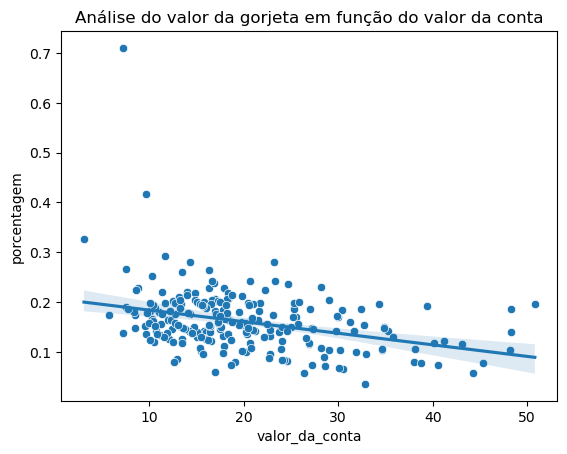

In [16]:
valor_porcentagem = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
valor_porcentagem.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_porcentagem.set(xlabel='Valor da Conta', ylabel='Porcentagem')

sns.regplot(x='valor_da_conta', y='porcentagem', data=gorjetas, scatter=False, ax=valor_porcentagem)

o valor da conta não é proporcional ao valor da gorjeta visualizando pela porcentagem

In [17]:
gorjetas[gorjetas.sobremesa == 'Yes']

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
56,38.01,3.00,Yes,Sat,Dinner,4,0.078927
58,11.24,1.76,Yes,Sat,Dinner,2,0.156584
60,20.29,3.21,Yes,Sat,Dinner,2,0.158206
61,13.81,2.00,Yes,Sat,Dinner,2,0.144823
62,11.02,1.98,Yes,Sat,Dinner,2,0.179673
...,...,...,...,...,...,...,...
234,15.53,3.00,Yes,Sat,Dinner,2,0.193175
236,12.60,1.00,Yes,Sat,Dinner,2,0.079365
237,32.83,1.17,Yes,Sat,Dinner,2,0.035638
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584


In [18]:
gorjetas[gorjetas.sobremesa == 'Yes'].describe()

,valor_da_conta,gorjeta,pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163196
std,9.832154,1.401468,0.810751,0.085119
min,3.070000,1.000000,1.000000,0.035638
25%,13.420000,2.000000,2.000000,0.106771
50%,17.920000,3.000000,2.000000,0.153846
75%,26.860000,3.680000,3.000000,0.195059
max,50.810000,10.000000,5.000000,0.710345


Dos 244 registros que nós temos, 93 pessoas pediram sobremesa; Dessas 93 pessoas, a média de valor da conta foi de 20; Dessas 93 pessoas, a média de valor da gorjeta foi de 3.

C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


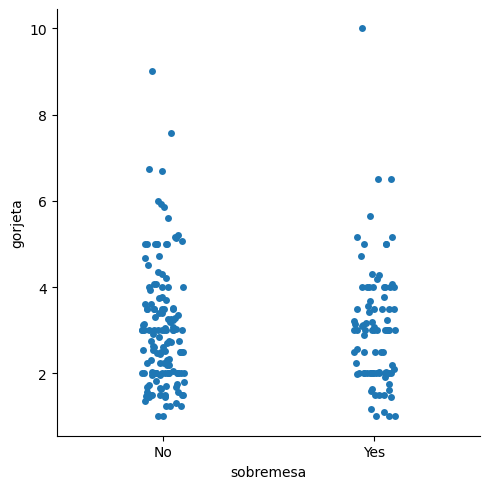

In [22]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

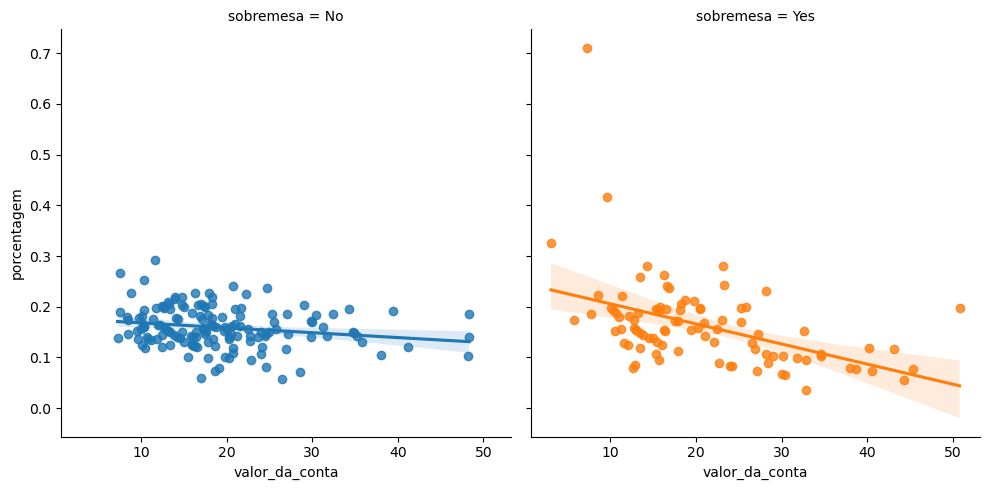

In [23]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

Gráfico de dispersão com uma linha de regressão linear para cada categoria de sobremesa (sobremesa ou sem sobremesa).

In [24]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

Os dias da semana usados como referencia para gorjeta.

C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


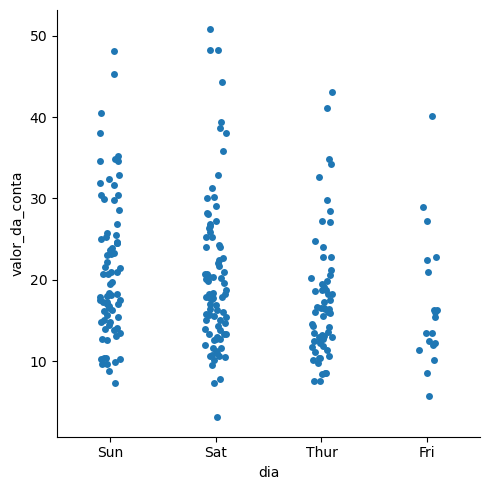

In [25]:
sns.catplot(x = 'dia', y = 'valor_da_conta', data = gorjetas)

Valor da conta conforme dia da semana.

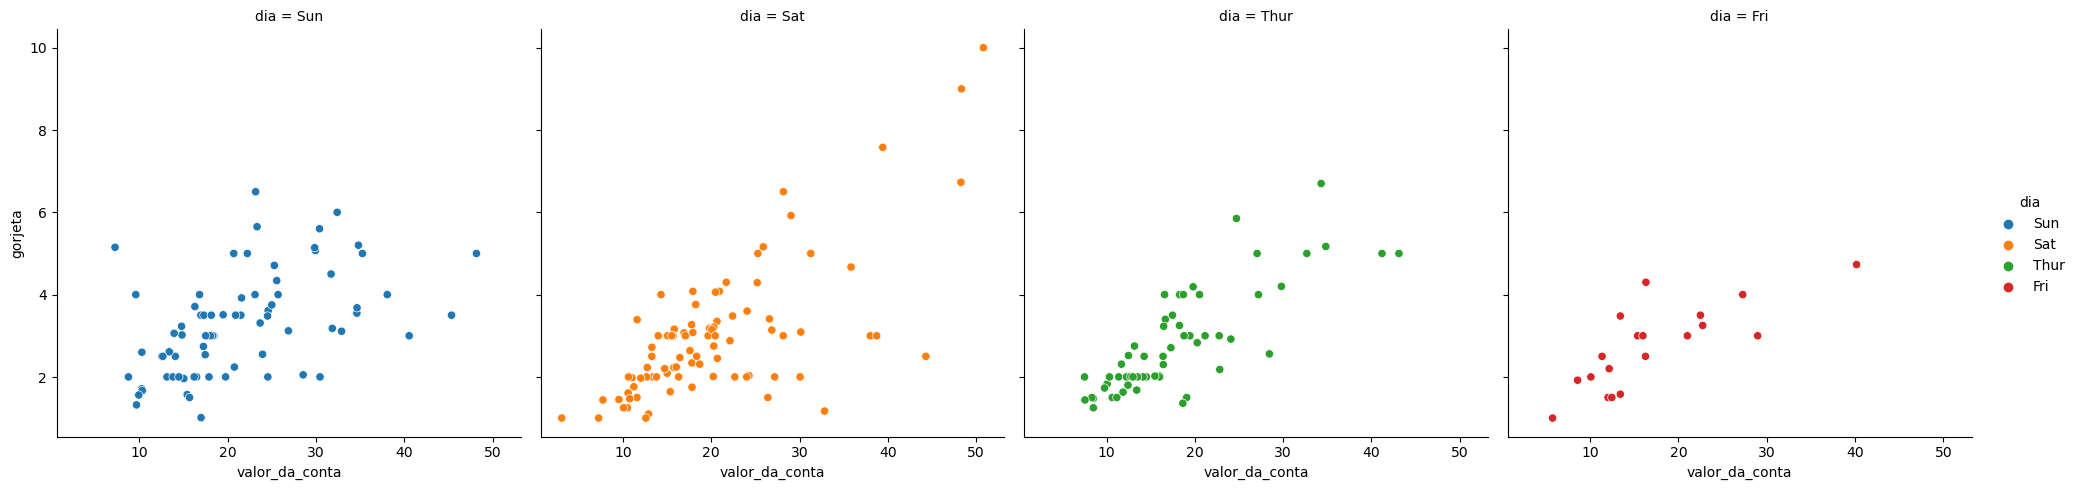

In [26]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

Valor da conta e da gorjeta relacionados aos dias da semana em gráficos separados.

In [30]:
gorjetas.dia.value_counts()

dia
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Frequencia do dia.

In [31]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

Tipo de refeição.

C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


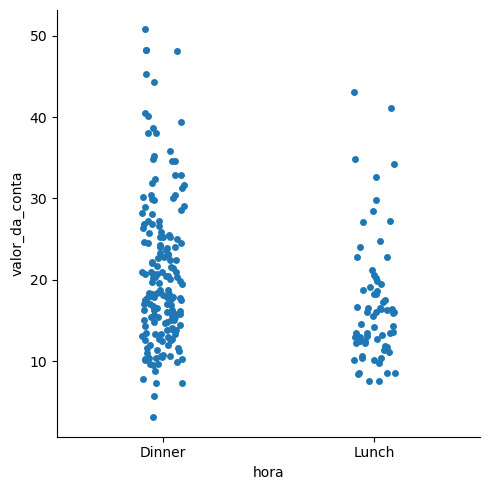

In [32]:
sns.catplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)

Analisando o valor da conta conforme a hora (tipo de refeição).

<Axes: xlabel='hora', ylabel='valor_da_conta'>

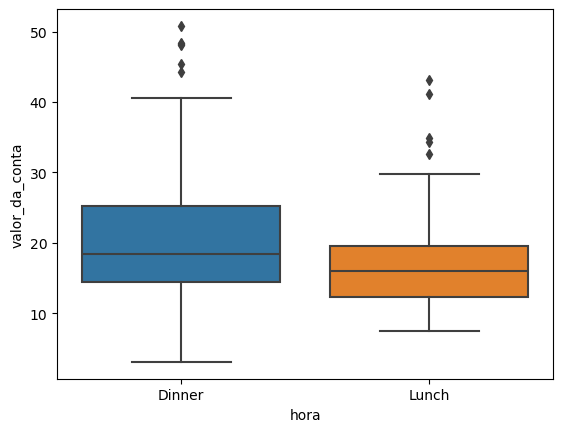

In [34]:
sns.boxplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)

Boxplot para mostrar os dados agrupados para melhor visualizar.

In [39]:
hora_almoco = gorjetas.query("hora == 'Lunch'").valor_da_conta
hora_almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


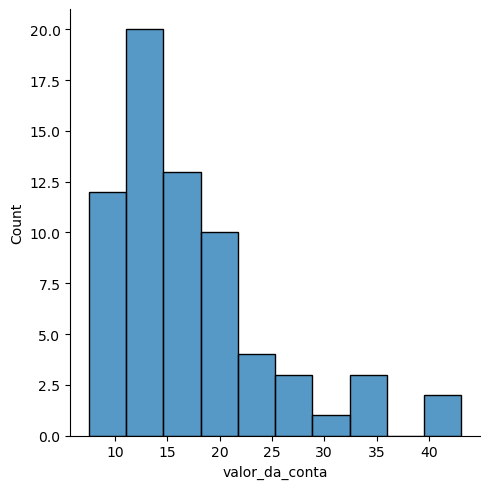

In [40]:
sns.displot(hora_almoco)

Histograma do valor da conta conforme a hora do almoço "lunch".

In [42]:
hora_jantar = gorjetas.query("hora == 'Dinner'").valor_da_conta

C:\Users\021120631\anaconda3\envs\dados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


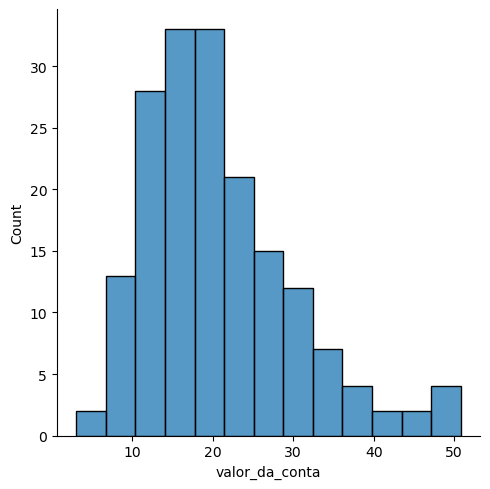

In [43]:
sns.displot(hora_jantar)

Histograma do valor da conta conforme a hora do jantar "dinner".